In [1]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from collections import Counter
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB



# Reading files

In [3]:
train_data=pd.read_csv("SalaryData_Train(1).csv")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
del train_data['education']

In [5]:
del train_data['relationship']

In [6]:
train_data


,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
30157,40,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
30158,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
30159,22,Private,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K


In [7]:
test_data=pd.read_csv("SalaryData_Test(1).csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
del test_data['education']

In [9]:
del test_data['relationship']

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
test_data.isnull().sum()

age              0
workclass        0
educationno      0
maritalstatus    0
occupation       0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
train_data['workclass']=encoder.fit_transform(train_data['workclass'])
train_data['maritalstatus']=encoder.fit_transform(train_data['maritalstatus'])
train_data['occupation']=encoder.fit_transform(train_data['occupation'])
train_data['race']=encoder.fit_transform(train_data['race'])
train_data['sex']=encoder.fit_transform(train_data['sex'])
train_data['native']=encoder.fit_transform(train_data['native'])
train_data

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,4,1,2174,0,40,37,<=50K
1,50,4,13,2,3,4,1,0,0,13,37,<=50K
2,38,2,9,0,5,4,1,0,0,40,37,<=50K
3,53,2,7,2,5,2,1,0,0,40,37,<=50K
4,28,2,13,2,9,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,4,0,0,0,38,37,<=50K
30157,40,2,9,2,6,4,1,0,0,40,37,>50K
30158,58,2,9,6,0,4,0,0,0,40,37,<=50K
30159,22,2,9,4,0,4,1,0,0,20,37,<=50K


In [13]:
test_data['workclass']=encoder.fit_transform(test_data['workclass'])
test_data['maritalstatus']=encoder.fit_transform(test_data['maritalstatus'])
test_data['occupation']=encoder.fit_transform(test_data['occupation'])
test_data['race']=encoder.fit_transform(test_data['race'])
test_data['sex']=encoder.fit_transform(test_data['sex'])
test_data['native']=encoder.fit_transform(test_data['native'])
test_data

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,2,1,0,0,40,37,<=50K
1,38,2,9,2,4,4,1,0,0,50,37,<=50K
2,28,1,12,2,10,4,1,0,0,40,37,>50K
3,44,2,10,2,6,2,1,7688,0,40,37,>50K
4,34,2,6,4,7,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,4,1,0,0,40,37,<=50K
15056,39,2,13,0,9,4,0,0,0,36,37,<=50K
15057,38,2,13,2,9,4,1,0,0,50,37,<=50K
15058,44,2,13,0,0,1,1,5455,0,40,37,<=50K


In [14]:
train_data.shape

(30161, 12)

In [15]:
test_data.shape

(15060, 12)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int32 
 2   educationno    30161 non-null  int64 
 3   maritalstatus  30161 non-null  int32 
 4   occupation     30161 non-null  int32 
 5   race           30161 non-null  int32 
 6   sex            30161 non-null  int32 
 7   capitalgain    30161 non-null  int64 
 8   capitalloss    30161 non-null  int64 
 9   hoursperweek   30161 non-null  int64 
 10  native         30161 non-null  int32 
 11  Salary         30161 non-null  object
dtypes: int32(6), int64(5), object(1)
memory usage: 2.1+ MB


In [17]:
train_data.describe()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.121316,2.580087,5.959849,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,2.550037,1.498018,4.029633,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,10.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,13.000000,4.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,16.000000,6.000000,13.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [18]:
test_data.describe()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.112749,2.595286,5.989044,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596
std,13.380676,0.966422,2.558727,1.505336,4.020113,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,10.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,13.000000,4.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,16.000000,6.000000,13.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [19]:
train_data.isnull().sum()

age              0
workclass        0
educationno      0
maritalstatus    0
occupation       0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
test_data.isnull().sum()

age              0
workclass        0
educationno      0
maritalstatus    0
occupation       0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

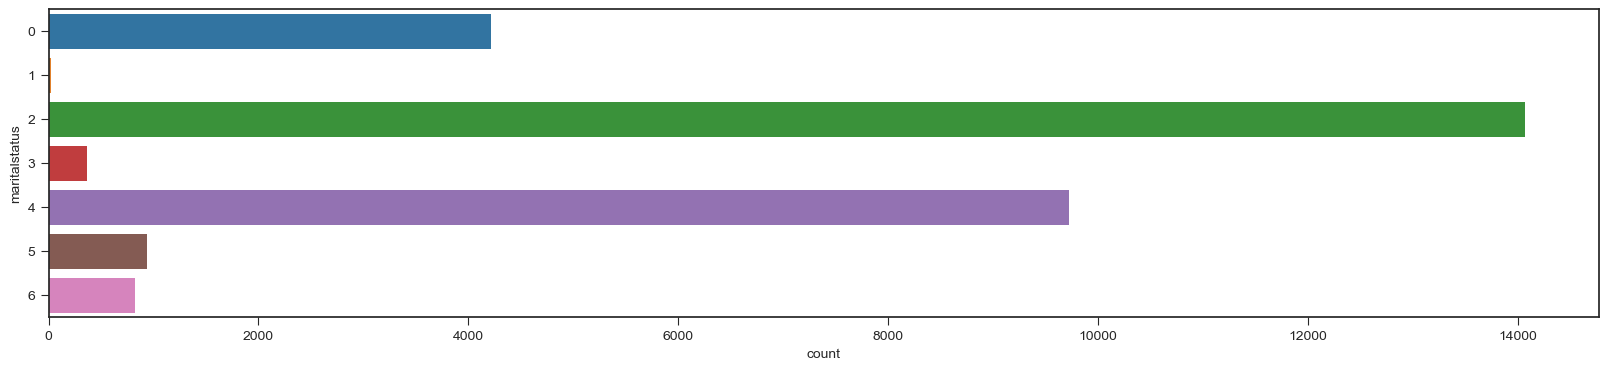

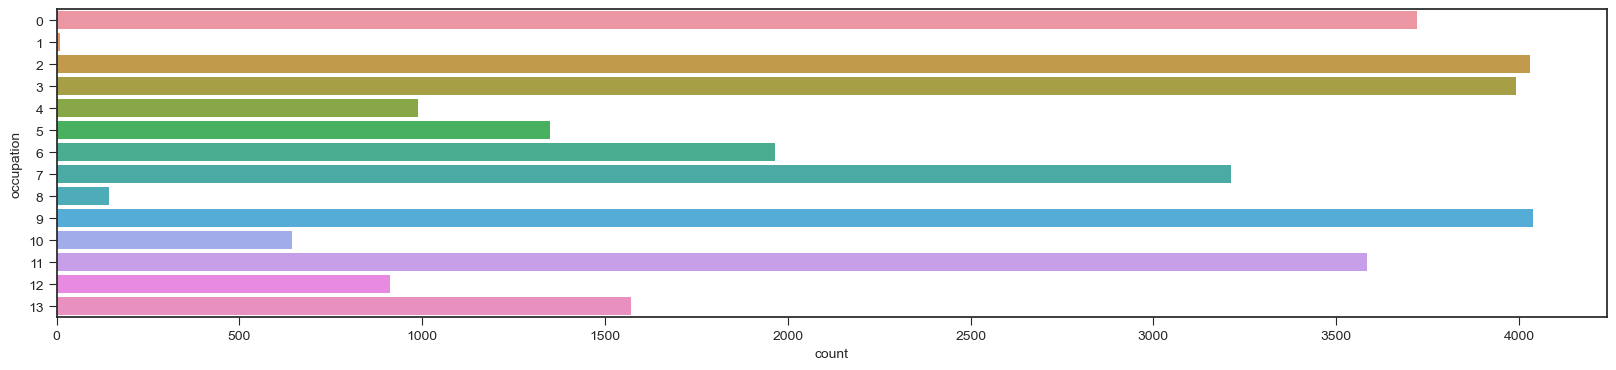

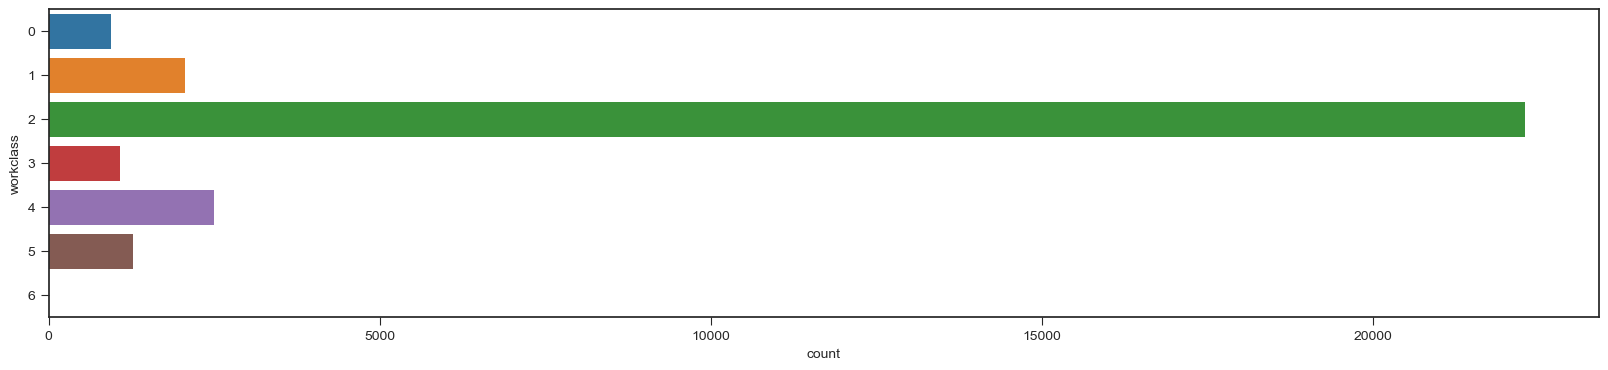

In [21]:
plt.figure(figsize=(20,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=train_data);

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=train_data);

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=train_data);

In [22]:
train_data.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16104\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,0.043525,-0.276363,-0.005682,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.037833,-0.034235,0.015572,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
educationno,0.043525,0.037833,1.000000,-0.063419,0.087717,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.063419,1.000000,0.022655,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,0.087717,0.022655,1.000000,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
race,0.023380,0.044734,0.032805,-0.068641,0.000717,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,0.006155,-0.119774,0.062316,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.124416,-0.042414,0.022162,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513
capitalloss,0.060278,0.007244,0.079691,-0.035385,0.014612,0.023461,0.047285,-0.032218,1.000000,0.052454,0.010193
hoursperweek,0.101598,0.050723,0.152522,-0.189004,0.018365,0.048533,0.231272,0.080431,0.052454,1.000000,0.008429


# heat map

C:\Users\Admin\AppData\Local\Temp\ipykernel_16104\3461456275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True);


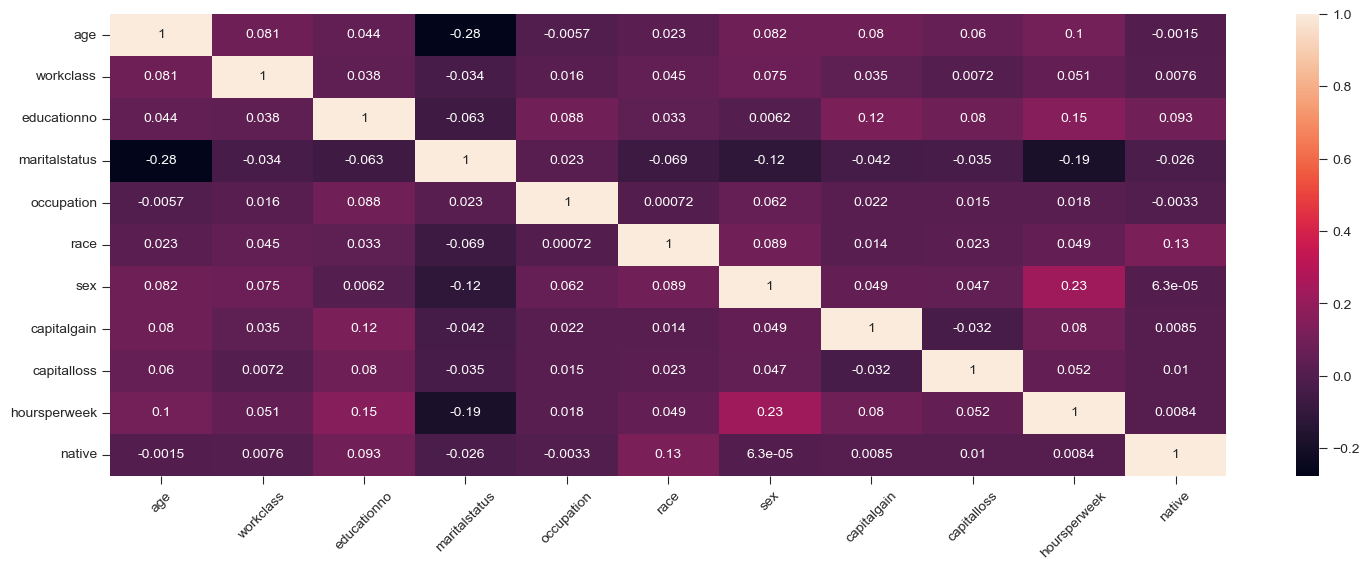

In [23]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(train_data.corr(), annot=True);
plt.xticks(rotation=45);

<AxesSubplot:xlabel='workclass', ylabel='count'>

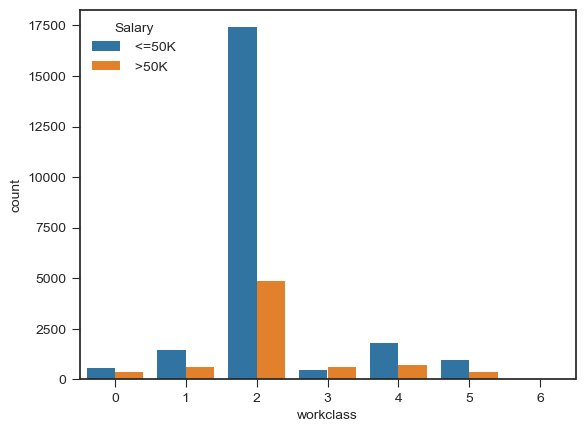

In [24]:
sns.countplot(data= train_data,x='workclass',hue='Salary')

<AxesSubplot:xlabel='workclass', ylabel='count'>

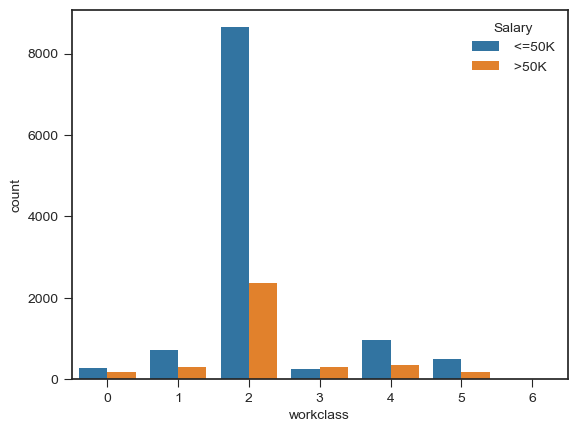

In [25]:
sns.countplot(data=test_data,x='workclass',hue='Salary')

In [26]:
# List of Numerical Variables
numerical_features=[feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
train_data[numerical_features].head()

Number of numerical variables: 11


,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,4,1,2174,0,40,37
1,50,4,13,2,3,4,1,0,0,13,37
2,38,2,9,0,5,4,1,0,0,40,37
3,53,2,7,2,5,2,1,0,0,40,37
4,28,2,13,2,9,2,0,0,0,40,4


In [27]:
discrete_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 6


# Univariate plots

In [28]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


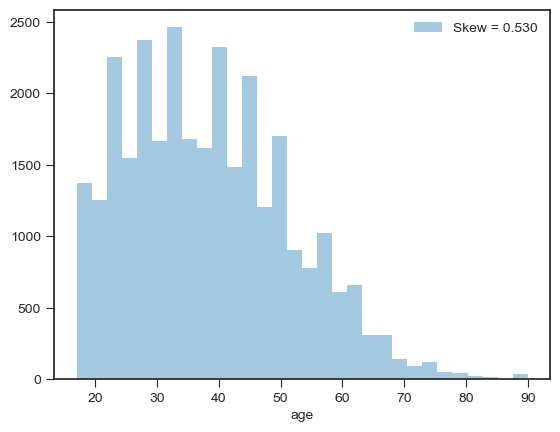

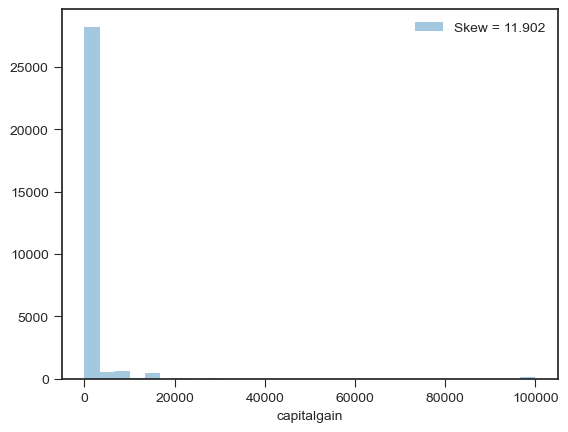

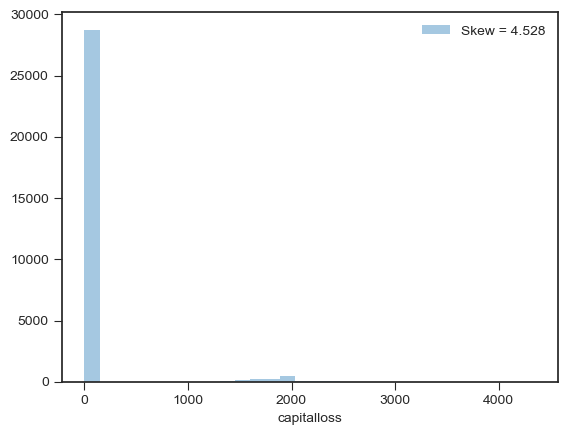

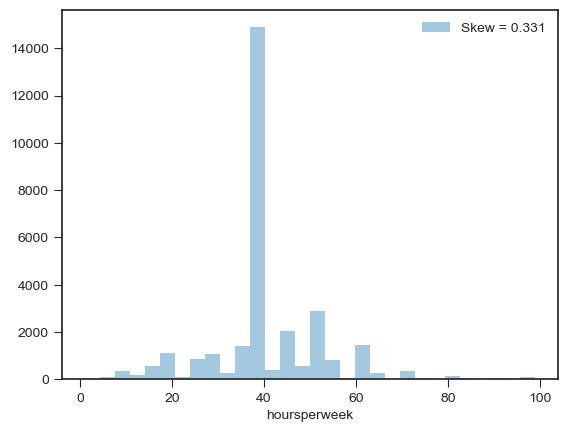

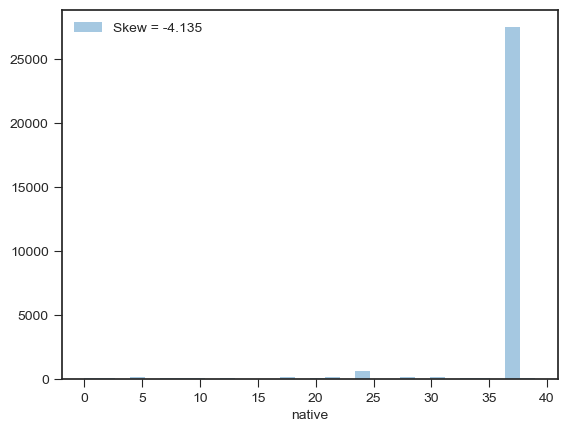

In [29]:
for feat in continuous_feature:
    skew = train_data[feat].skew()
    sns.distplot(train_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show();

In [30]:
continuous_feature

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'native']

# Model Building

In [31]:
X_train=train_data.iloc[:,:-1]
Y_train=train_data.iloc[:,-1]
X_test=test_data.iloc[:,:-1]
Y_test=test_data.iloc[:,-1]

In [32]:
X_train

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,4,1,2174,0,40,37
1,50,4,13,2,3,4,1,0,0,13,37
2,38,2,9,0,5,4,1,0,0,40,37
3,53,2,7,2,5,2,1,0,0,40,37
4,28,2,13,2,9,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,4,0,0,0,38,37
30157,40,2,9,2,6,4,1,0,0,40,37
30158,58,2,9,6,0,4,0,0,0,40,37
30159,22,2,9,4,0,4,1,0,0,20,37


In [33]:
Y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [34]:
X_test

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,7,4,6,2,1,0,0,40,37
1,38,2,9,2,4,4,1,0,0,50,37
2,28,1,12,2,10,4,1,0,0,40,37
3,44,2,10,2,6,2,1,7688,0,40,37
4,34,2,6,4,7,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,4,1,0,0,40,37
15056,39,2,13,0,9,4,0,0,0,36,37
15057,38,2,13,2,9,4,1,0,0,50,37
15058,44,2,13,0,0,1,1,5455,0,40,37


In [35]:
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

<AxesSubplot:xlabel='occupation', ylabel='count'>

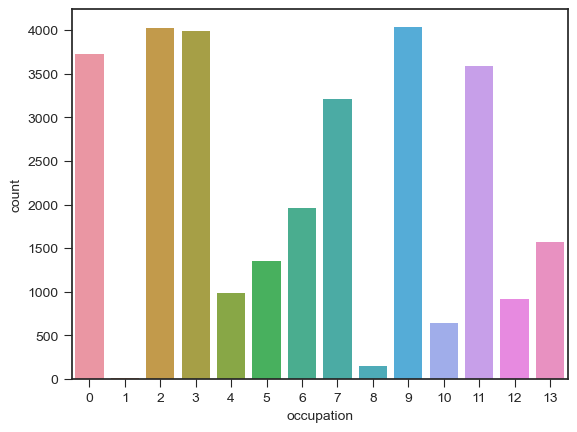

In [36]:
sns.countplot(data=train_data,x='occupation')

<AxesSubplot:xlabel='Salary', ylabel='count'>

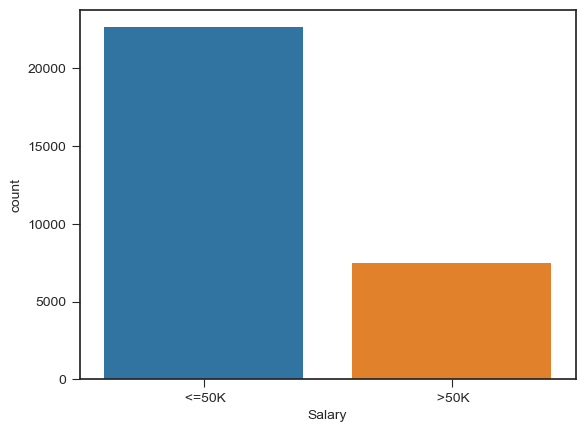

In [37]:
sns.countplot(data=train_data,x='Salary')

# Gaussian

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [45]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [46]:
Y_test_pred=gnb.predict(X_test)
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
confusion_matrix(Y_test,Y_test_pred)

array([[10778,   582],
       [ 2552,  1148]], dtype=int64)

In [49]:
accuracy_score(Y_test,Y_test_pred)

0.7918990703851262

In [50]:
Y_train.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [51]:
Y_test.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [52]:
gb = GaussianNB()
gb.fit(X_train,Y_train)
pred_gb = gb.predict(X_test)
pred_gb

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [53]:
acc_gb = np.mean(pred_gb==Y_test)
acc_gb

0.7918990703851262